# 순환신경망

# 실습: IMDB 데이터를 직접 다운받아서 활용

## 간단한 순환신경망

### 데이터 불러오기

In [3]:
import os
import numpy as np

In [4]:
base_dir = '../필요데이터/aclImdb'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [5]:
train_texts = []
train_labels = []

for label in ['neg', 'pos']:
    text_dir = os.path.join(train_dir, label)
    
    for fname in os.listdir(text_dir):
        f = open(os.path.join(text_dir, fname), encoding = 'utf8')
        train_texts.append(f.read())
        f.close()
        
        if label == 'neg':
            train_labels.append(0)
        else:
            train_labels.append(1)

In [7]:
len(train_texts), len(train_labels)

(25000, 25000)

In [10]:
train_texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [11]:
train_labels[0]

0

In [6]:
test_texts = []
test_labels = []

for label in ['neg', 'pos']:
    text_dir = os.path.join(test_dir, label)
    
    for fname in os.listdir(text_dir):
        f = open(os.path.join(text_dir, fname), encoding = 'utf8')
        test_texts.append(f.read())
        f.close()
        
        if label == 'neg':
            test_labels.append(0)
        else:
            test_labels.append(1)

In [9]:
len(test_texts), len(test_labels)

(25000, 25000)

### 데이터 토큰화
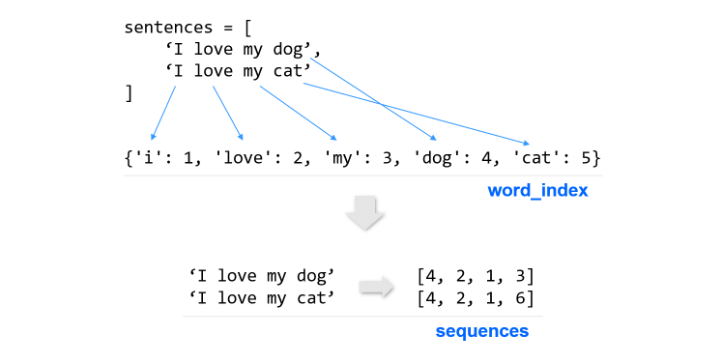

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
# Tokenizer: 문장으로부터 단어를 토큰화하고 숫자에 대응시키는 딕셔너리를 사용할 수 있도록 함
## num_words: 단어의 개수를 제한
tokenizer = Tokenizer(num_words = 10000)


#fit_on_texts(): 문자 데이터를 입력받아서 리스트의 형태로 변환
tokenizer.fit_on_texts(train_texts)


#texts_to_sequences(): 단어들을 시퀀스의 형태로 변환
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [29]:
print(len(train_sequences))
print(train_sequences[:10])

25000
[[62, 4, 3, 129, 34, 44, 7576, 1414, 15, 3, 4252, 514, 43, 16, 3, 633, 133, 12, 6, 3, 1301, 459, 4, 1751, 209, 3, 7693, 308, 6, 676, 80, 32, 2137, 1110, 3008, 31, 1, 929, 4, 42, 5120, 469, 9, 2665, 1751, 1, 223, 55, 16, 54, 828, 1318, 847, 228, 9, 40, 96, 122, 1484, 57, 145, 36, 1, 996, 141, 27, 676, 122, 1, 411, 59, 94, 2278, 303, 772, 5, 3, 837, 20, 3, 1755, 646, 42, 125, 71, 22, 235, 101, 16, 46, 49, 624, 31, 702, 84, 702, 378, 3493, 2, 8422, 67, 27, 107, 3348], [4517, 514, 14, 3, 3417, 159, 8595, 1702, 6, 4892, 53, 16, 4518, 5674, 138, 5, 1023, 4988, 3050, 4519, 588, 1339, 34, 6, 1544, 95, 3, 758, 4, 5, 24, 3513, 8, 4, 9, 109, 3051, 5, 1, 1067, 14, 3, 4520, 79, 20, 2086, 6, 4519, 574, 2798, 7262, 38, 489, 1, 8595, 301, 122, 14, 4253, 18, 1693, 942, 1, 1702, 6, 6538, 31, 1, 998, 1807, 667, 24, 104, 2602, 485, 34, 3285, 1, 6539, 1048, 43, 16, 2753, 2547, 33, 1340, 5, 2103, 1, 4518, 1537, 20, 3, 1702, 3249, 20, 32, 4348, 1105, 18, 134, 228, 24, 4760, 217, 1927, 32, 3230, 8, 1, 4

In [20]:
# word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환
tokenizer.word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

### 데이터 패딩화
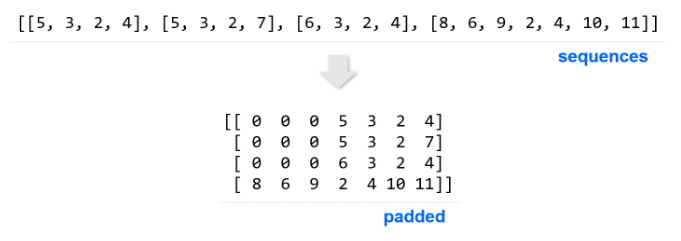

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# pad_sequence(): 서로 다른 개수의 단어로 이루어진 문장을 같은 길이로 만들어주기 위해 패딩을 사용
train_texts = pad_sequences(train_sequences, maxlen = 500)
test_texts = pad_sequences(test_sequences, maxlen = 500)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [31]:
train_texts.shape, test_texts.shape, train_labels.shape, test_labels.shape

((25000, 500), (25000, 500), (25000,), (25000,))

### 데이터 무작위로 섞기

In [38]:
ind = np.arange(25000)
np.random.shuffle(ind)

train_texts = train_texts[ind]
train_labels = train_labels[ind]

x_train, x_val = train_texts[:20000], train_texts[20000:]
y_train, y_val = train_labels[:20000], train_labels[20000:]

In [39]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((20000, 500), (20000,), (5000, 500), (5000,))

### 모델 생성

In [41]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, Embedding

In [42]:
model = Sequential()

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/10
157/157 [==============================] - 28s 177ms/step - loss: 0.5982 - acc: 0.6669 - val_loss: 0.4504 - val_acc: 0.7978
Epoch 2/10
157/157 [==============================] - 27s 172ms/step - loss: 0.3726 - acc: 0.8433 - val_loss: 0.4628 - val_acc: 0.7804
Epoch 3/10
157/157 [==============================] - 26s 165ms/step - loss: 0.2770 - acc: 0.8921 - val_loss: 0.3827 - val_acc: 0.8318
Epoch 4/10
157/157 [==============================] - 26s 163ms/step - loss: 0.2121 - acc: 0.9215 - val_loss: 0.3543 - val_acc: 0.8544
Epoch 5/10
157/157 [==============================] - 25s 158ms/step - loss: 0.1391 - acc: 0.9520 - val_loss: 0.4912 - val_acc: 0.7886
Epoch 6/10
157/157 [==============================] - 25s 158ms/step - loss: 0.0894 - acc: 0.9706 - val_loss: 0.5083 - val_acc: 0.7976
Epoch 7/10
157/157 [==============================] - 25s 161ms/step - loss: 0.0513 - acc: 0.9854 - val_loss: 0.4886 - val_acc: 0.8502
Epoch 8/10
157/157 [==============================] - 2

### 시각화

In [47]:
import matplotlib.pyplot as plt

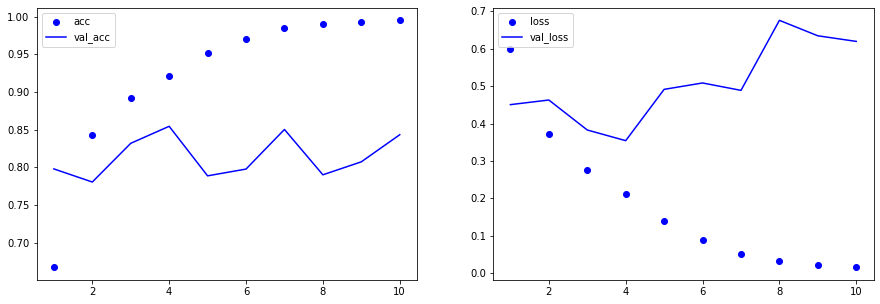

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

- 이전에 순환신경망이 아닌 일반 임베딩 모델로 돌렸을 때보단 정확도나 손실이 낫게 나옴
- 하지만, 과대적합이 너무 빨리 나타난다는 것이 문제

## 조금 덜 간단한 순환신경망 만들기

In [50]:
model = Sequential()

model.add(Embedding(10000, 32, ))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history2 = model.fit(x_train, y_train,
                      epochs = 10,
                      batch_size = 128,
                      validation_data = (x_val, y_val))

Epoch 1/10
157/157 [==============================] - 74s 474ms/step - loss: 0.6839 - acc: 0.5411 - val_loss: 0.6541 - val_acc: 0.5938
Epoch 2/10
157/157 [==============================] - 77s 493ms/step - loss: 0.6573 - acc: 0.5815 - val_loss: 0.6398 - val_acc: 0.5848
Epoch 3/10
157/157 [==============================] - 74s 469ms/step - loss: 0.6085 - acc: 0.6210 - val_loss: 0.6391 - val_acc: 0.5954
Epoch 4/10
157/157 [==============================] - 77s 488ms/step - loss: 0.5931 - acc: 0.6286 - val_loss: 0.6090 - val_acc: 0.6121
Epoch 5/10
157/157 [==============================] - 77s 487ms/step - loss: 0.5716 - acc: 0.6402 - val_loss: 0.5940 - val_acc: 0.6260
Epoch 6/10
157/157 [==============================] - 76s 483ms/step - loss: 0.5593 - acc: 0.6453 - val_loss: 0.6255 - val_acc: 0.6281
Epoch 7/10
157/157 [==============================] - 78s 499ms/step - loss: 0.5512 - acc: 0.6510 - val_loss: 0.6003 - val_acc: 0.6205
Epoch 8/10
157/157 [==============================] - 8

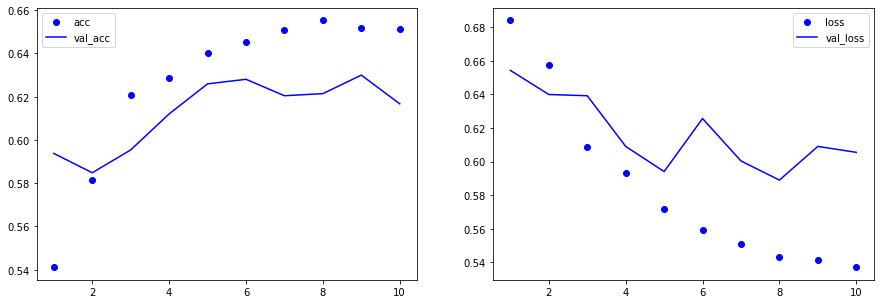

In [52]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

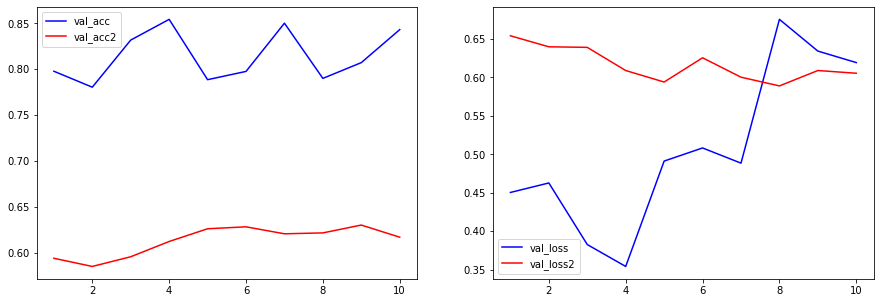

In [53]:
val_acc = history.history['val_acc']
val_acc2 = history2.history['val_acc']
val_loss = history.history['val_loss']
val_loss2 = history2.history['val_loss']

val1 = ['val_acc', 'val_loss']
val2 = ['val_acc2', 'val_loss2']

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(val1[i]), 'b', label = val1[i])
    plt.plot(epochs, eval(val2[i]), 'r', label = val2[i])
    plt.legend()
plt.show()

- 무작정 순환신경망을 여러개 쓴다고해서 + 이전 은닉상태를 기억하게 한다고 해서 성능이 좋아지진 않음^^
- 다만 과대적합은 좀 줄어든 듯 ㅋㅋ..
- 이게 전체 시퀀스가 아닌 순서대로 500개의 단어만 뽑아내서 입력에 사용했기 때문임
- 또 SimpleRNN은 텍스트처럼 긴 시퀀스를 처리하는 데 적합하지 않음
- 더 잘 작동하는 고급 순환층은 LSTM, GRU임